# ASSIGNNMENT 4

In [1]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
import numpy as np
from scipy.stats import norm, t

M=100

Populating the interactive namespace from numpy and matplotlib


In [2]:
#to highlight printed text
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
#For dataset1
def exp(ndice):
    o = np.random.randint(low = 1, high = 9, size = ndice)
    d = np.random.randint(low = 1, high = 13, size = ndice)
    i = np.random.randint(low = 1, high = 21, size = ndice)
    n = 0
    for k in range(ndice):
        if o[k] + d[k] ==i[k] :
            n +=1
    return n/ndice       

In [4]:
#For dataset1
def repeat_exp(repeat, ndice):
    result = []
    for i in range(repeat):
        result.append(exp(ndice))
    return result   

In [5]:
#Normalized Sampling Distribution
def Z_calc(mean_list,std_list,n):
    return sqrt(n)*(mean_list-np.array(mean_list).mean())/std_list

In [6]:
#Sampling Distribution v/s T Distribution v/s Unit normal distribution
def compare(mean_list,sample_list, n):
    
    fig, (ax1, ax2) = subplots(1, 2, figsize=(16,4))
    
    print('\n'+color.BOLD+f'For sample size {n}'+color.END)
    print('\N{greek small letter mu} =', np.array(mean_list).mean())
    print('\N{greek small letter sigma} =', np.array(mean_list).std(),'\n')
    
    ax1.hist(sample_list, bins = 20);
    ax1.set_title('Sampling Distribution')
    x = linspace(norm.ppf(0.001),norm.ppf(0.999))
    z=Z_calc(mean_list,sample_list,n)
    ax2.plot(x,t(n-1).pdf(x),'g--',linewidth=5)
    ax2.plot(x, norm.pdf(x,loc=0,scale=1))
    ax2.hist(z,density=1,bins=20,color='green',alpha=0.5)
    ax2.set_title('Normalized Sampling Distribution v/s T Distribution v/s Unit Normal Distribution')
    ax2.legend(['T Distribution','Unit Normal Distribution','Normalized Sampling Distribution'])
    ax2.grid()
    
    
    plt.show()
    print('\n')

In [7]:
#compute half_width
def width(std,n):
    return std/np.sqrt(n)

In [8]:
#Confident Intervals computed using T distribution and Unit normal distribution
def CIs(mean_sample_list, std_sample_list, n, alpha):
    rv = t(n-1)
    rv1 = norm(loc = 0, scale = 1)
    t_star = rv.ppf(1 - alpha/2)
    z_star = rv1.ppf(1 - alpha/2)
    half_width=width(std_sample_list,n)
    interval_t = np.array([mean_sample_list - t_star*half_width, mean_sample_list + t_star*half_width])
    interval_z = np.array([mean_sample_list - z_star*half_width, mean_sample_list + z_star*half_width])
    
    return interval_t.T, interval_z.T

In [9]:
def verify(data_set, CI):
    mu = data_set.mean()
    m = 0
    for item in CI:
        if mu > item[0] and mu < item[1]:
            m = m + 1
            
    return m/len(CI)*100

In [10]:
def pdf_cdf_plot(data,n):
    fig, (ax1, ax2) = subplots(1, 2, figsize=(12,3));
    ax1.hist(data, bins = 15);
    ax1.set_title(f'PDF of dataset{n}');
    ax1.grid()
    ax2.hist(data, bins = 25, cumulative=1);
    ax2.set_title(f'CDF of dataset{n}');
    ax1.grid()
    plt.show()    

#### DATASET-1    
#### Dice Throw (O+D=I) 

In [11]:
dice = 100
repeat = 1000
dataset1 = np.array(repeat_exp(repeat,dice))

#### DATASET-2
#### COVID-19 global daily cases (new cases per day)

In [12]:
dataset2=np.array([0,265,472,698,785,1781,1477,1755,2010,2127,2603,2838,3239,3915,3721,3173,3437,2676,3001,
                        2546,2035,14153,5151,2662,2097,2132,2003,1852,516,977,996,978,554,882,741,992,1288,1507,1990,
                        1980,1862,2571,2306,3094,3641,4058,3896,4435,4571,7316,8259,10933,10985,13031,12927,15776,
                        20737,26179,30712,29492,32477,41626,43894,48737,61105,64855,66880,60644,64428,74217,77458,
                        80453,84433,81792,70920,73287,78608,84839,85486,92206,79656,71712,70442,73370,83053,81008,
                        85256,80654,75624,73690,75636,80258,84951,102100,90412,73545,69543,75549,79967,85995,95173,
                        82887,82344,79503,81467,95973,96449,96635,89361,80051,74819,85584,89445,96957,100292,96807,
                        82243,90095,95195,102752,107742,108030,99935,96734,90040,92820,106816,116833,126125,124333,
                        108978,104576,115705,120490,130511,130613,128677])

#### DATASET-3
#### GISTEMP records

In [13]:
data = []
for line in open('annual_csv.csv'):
    line= line.split(',')
    if line[0] == 'GISTEMP':
        data.append(14.2 + float(line[2].strip()))
dataset3 = np.array(data)

## FOR DATASET-1

In [14]:
print("Mean of dataset1            "+str(mean(dataset1)))
print("Variance of dataset1        "+str(var(dataset1)))
print("Std deviation of dataset1   "+str(std(dataset1)))

Mean of dataset1            0.05002000000000001
Variance of dataset1        0.00047139960000000005
Std deviation of dataset1   0.021711738760403325


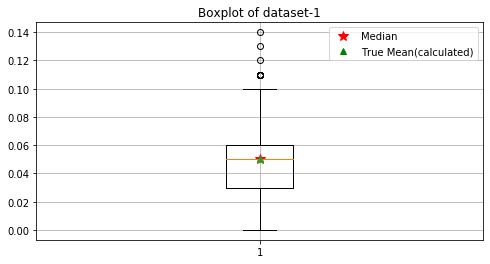

In [15]:
fig, ax1 = subplots(1, 1, figsize=(8,4))
percentile_25, median_data, percentile_75 = np.percentile(dataset1, [25, 50, 75])
ax1.boxplot(dataset1, showmeans=True);
ax1.plot(1,median_data,'r*',markersize=10,label='Median')
ax1.plot(1,mean(dataset1),'g^',label='True Mean(calculated)')
ax1.grid()
ax1.set_title('Boxplot of dataset-1')
ax1.legend()

In [16]:
print("Median of dataset1                     {}".format(median_data))
print("25th and 75th percentile of dataset1   {}, {}".format(percentile_25,percentile_75))
iqr_data = percentile_75 - percentile_25
print("Interquartile range of dataset1        {}".format(iqr_data))
print(f"Minimum of dataset1                    {dataset1.min()}")
print(f"Maximum of dataset1                    {dataset1.max()}")

Median of dataset1                     0.05
25th and 75th percentile of dataset1   0.03, 0.06
Interquartile range of dataset1        0.03
Minimum of dataset1                    0.0
Maximum of dataset1                    0.14


In [17]:
means = [[],[],[],[]]
stds = [[],[],[],[]]
for i in range(4):
    for j in range(M):
        n = 5*pow(2,i)
        a = dataset1[np.random.randint(low = 0, high = len(dataset1), size = n)]
        means[i].append(np.mean(a))
        stds[i].append(np.std(a))
    means[i]=np.array(means[i])
    stds[i]=np.array(stds[i])


For sample size 5
μ = 0.050019999999999995
σ = 0.010262533800187944 



<Figure size 432x288 with 0 Axes>

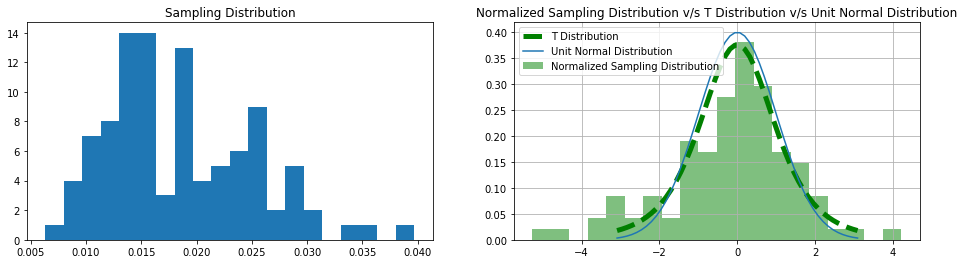




For sample size 10
μ = 0.052100000000000014
σ = 0.007617742447733452 



<Figure size 432x288 with 0 Axes>

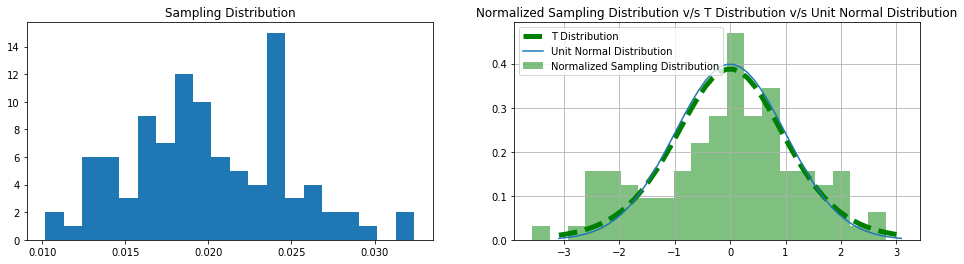




For sample size 20
μ = 0.05009000000000001
σ = 0.004791335930614761 



<Figure size 432x288 with 0 Axes>

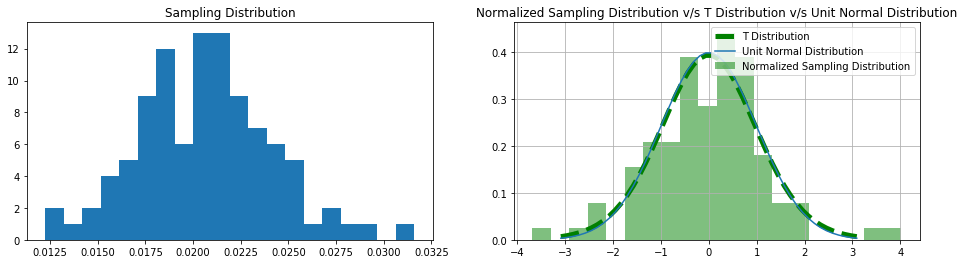




For sample size 40
μ = 0.049855000000000003
σ = 0.003313642255887018 



<Figure size 432x288 with 0 Axes>

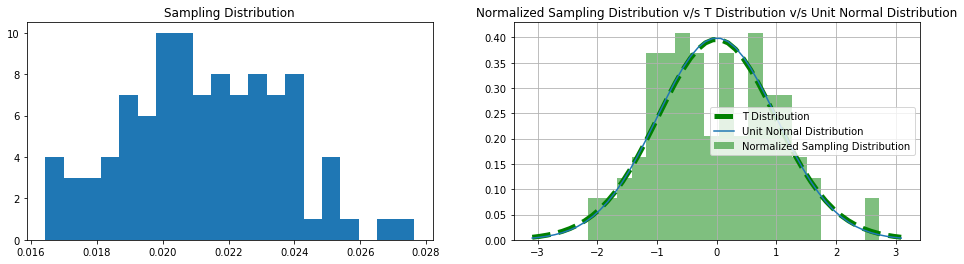

In [18]:
for i in range(4):
    figure(i)
    n=5*pow(2,i)
    compare(means[i],stds[i],n)

In [19]:
# 80%, 95% and 99% confidence intervals
width_t1=[[],[],[],[]]
for i in range(4):
    n=5*pow(2,i)
    print('\n'+color.BOLD+f'For n = {n}\n'+color.END)
    for x in np.array([80,95,99]):
        alpha = 1 - x/100
        interval_dataset1_t, interval_dataset1_z = CIs(means[i], stds[i], n, alpha)
        width_t1[i].append(2*width(stds[i],n)*t(n-1).ppf(1 - alpha/2))
        print(color.GREEN+f'{x}% Confidence Intervals'+color.END)
        T=verify(dataset1, interval_dataset1_t)
        Z=verify(dataset1, interval_dataset1_z)
        print(f'{T}% instances of {x}% CI computed using T distribution contains true mean.')
        print(f'{Z}% instances of {x}% CI computed using unit normal distribution contains true mean.\n')
    print('\n')


For n = 5

80% Confidence Intervals
74.0% instances of 80% CI computed using T distribution contains true mean.
64.0% instances of 80% CI computed using unit normal distribution contains true mean.

95% Confidence Intervals
90.0% instances of 95% CI computed using T distribution contains true mean.
80.0% instances of 95% CI computed using unit normal distribution contains true mean.

99% Confidence Intervals
99.0% instances of 99% CI computed using T distribution contains true mean.
88.0% instances of 99% CI computed using unit normal distribution contains true mean.




For n = 10

80% Confidence Intervals
66.0% instances of 80% CI computed using T distribution contains true mean.
62.0% instances of 80% CI computed using unit normal distribution contains true mean.

95% Confidence Intervals
93.0% instances of 95% CI computed using T distribution contains true mean.
83.0% instances of 95% CI computed using unit normal distribution contains true mean.

99% Confidence Intervals
100.0% i

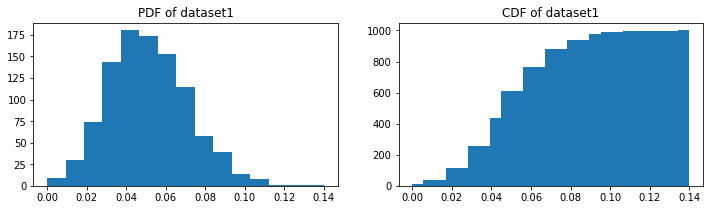

In [20]:
pdf_cdf_plot(dataset1,1)

#### BOXPLOT v/s CI

In [21]:
for i in range(4):
    n=5*pow(2,i)
    print('\n'+color.BOLD+f'For n = {n}\n'+color.END)
    for j in range(3):
        x=[80,95,100]
        print(color.GREEN+f'{x[j]}% Confidence Intervals'+color.END)
        print(f'Fraction of CIs whose width is greater than the IQR of dataset1: {np.sum(width_t1[i][j]>iqr_data)}%\n')


For n = 5

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 29%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 80%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 99%


For n = 10

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 0%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 40%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 85%


For n = 20

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 0%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 0%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 18%


For n = 40

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset1: 0%



### CONCLUSIONS ON DATASET-1
#### The box plot is 100% accurate in providing the true mean of the data set, as it runs over the entire Dataset-1.  
#### A few points to note here:
    Mean and median of dataset-1 are equal.
    25th and 75th percentile of this dataset are at equal separation from the median(or mean).
#### This implies that this dataset is uniformly random and symmetric about the mean/median, as seen in `pdf` and `cdf` of datset1. 

#### In dataset1, we observe that, due to a well defined function being able to replicate the distribution, we can consider the boxplot as a good representation of the dataset.

## FOR DATASET-2

In [22]:
print("Mean of dataset2            "+str(mean(dataset2)))
print("Variance of dataset2        "+str(var(dataset2)))
print("Std deviation of dataset2   "+str(std(dataset2)))

Mean of dataset2            50865.2700729927
Variance of dataset2        1867733943.2044327
Std deviation of dataset2   43217.28755028979


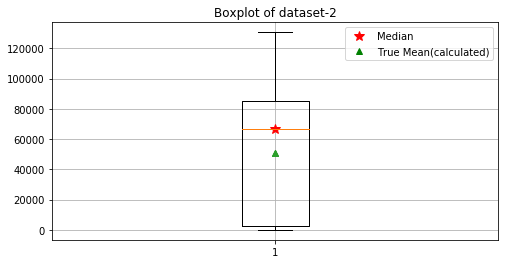

In [23]:
fig, ax1 = subplots(1, 1, figsize=(8,4))
percentile_25, median_data, percentile_75 = np.percentile(dataset2, [25, 50, 75])
ax1.boxplot(dataset2, showmeans=True);
ax1.plot(1,median_data,'r*',markersize=10,label='Median')
ax1.plot(1,mean(dataset2),'g^',label='True Mean(calculated)')
ax1.grid()
ax1.set_title('Boxplot of dataset-2')
ax1.legend()

In [24]:
print("Median of dataset2                     {}".format(median_data))
print("25th and 75th percentile of dataset2   {}, {}".format(percentile_25,percentile_75))
iqr_data = percentile_75 - percentile_25
print("Interquartile range of dataset2        {}".format(iqr_data))
print(f"Minimum of dataset2                    {dataset2.min()}")
print(f"Maximum of dataset2                    {dataset2.max()}")

Median of dataset2                     66880.0
25th and 75th percentile of dataset2   2838.0, 85486.0
Interquartile range of dataset2        82648.0
Minimum of dataset2                    0
Maximum of dataset2                    130613


In [25]:
means = [[],[],[],[]]
stds = [[],[],[],[]]
for i in range(4):
    for j in range(M):
        n = 5*pow(2,i)
        a = dataset2[np.random.randint(low = 0, high = len(dataset2), size = n)]
        means[i].append(np.mean(a))
        stds[i].append(np.std(a))
    means[i]=np.array(means[i])
    stds[i]=np.array(stds[i])


For sample size 5
μ = 52569.795999999995
σ = 19434.18742099561 



<Figure size 432x288 with 0 Axes>

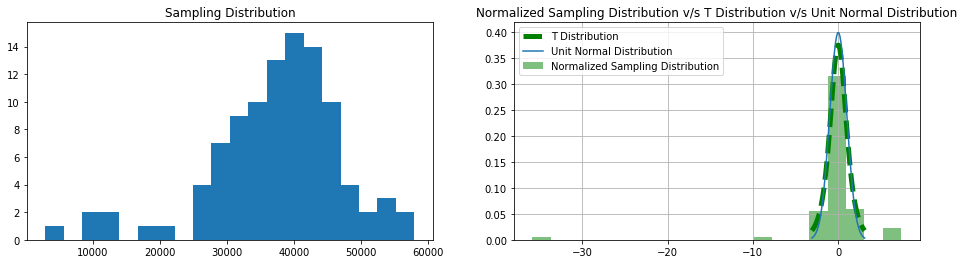




For sample size 10
μ = 50859.092000000004
σ = 12472.151357794532 



<Figure size 432x288 with 0 Axes>

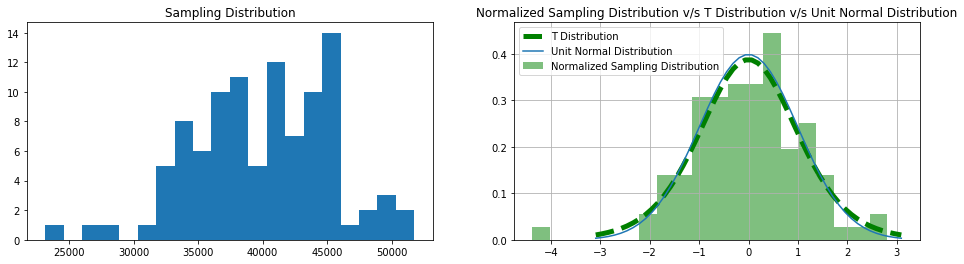




For sample size 20
μ = 51744.10199999999
σ = 9048.610963343823 



<Figure size 432x288 with 0 Axes>

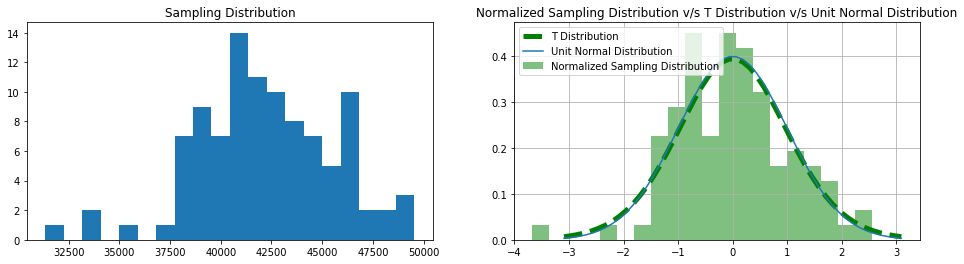




For sample size 40
μ = 50999.368749999994
σ = 6511.790434968111 



<Figure size 432x288 with 0 Axes>

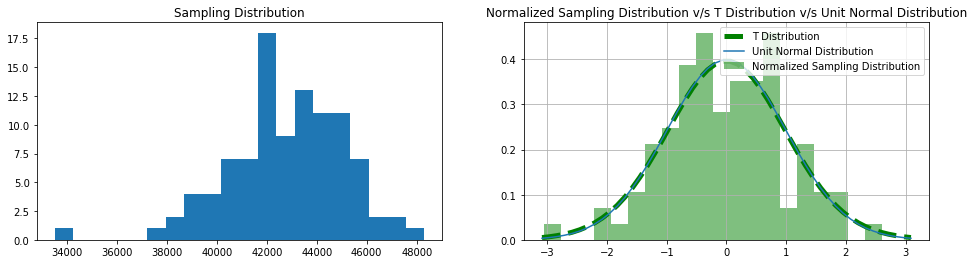

In [26]:
for i in range(4):
    figure(i)
    n=5*pow(2,i)
    compare(means[i],stds[i],n)

In [27]:
width_t2=[[],[],[],[]]
for i in range(4):
    n=5*pow(2,i)
    print('\n'+color.BOLD+f'For n = {n}\n'+color.END)
    for x in np.array([80,95,99]):
        alpha = 1 - x/100
        interval_dataset2_t, interval_dataset2_z = CIs(means[i], stds[i], n, alpha)
        width_t2[i].append(2*width(stds[i],n)*t(n-1).ppf(1 - alpha/2))
        print(color.GREEN+f'{x}% Confidence Intervals'+color.END)
        T=verify(dataset2, interval_dataset2_t)
        Z=verify(dataset2, interval_dataset2_z)
        print(f'{T}% instances of {x}% CI using T distribution contains true mean.')
        print(f'{Z}% instances of {x}% CI using unit normal distribution contains true mean.\n')
    print('\n')


For n = 5

80% Confidence Intervals
79.0% instances of 80% CI using T distribution contains true mean.
71.0% instances of 80% CI using unit normal distribution contains true mean.

95% Confidence Intervals
91.0% instances of 95% CI using T distribution contains true mean.
87.0% instances of 95% CI using unit normal distribution contains true mean.

99% Confidence Intervals
93.0% instances of 99% CI using T distribution contains true mean.
90.0% instances of 99% CI using unit normal distribution contains true mean.




For n = 10

80% Confidence Intervals
82.0% instances of 80% CI using T distribution contains true mean.
78.0% instances of 80% CI using unit normal distribution contains true mean.

95% Confidence Intervals
97.0% instances of 95% CI using T distribution contains true mean.
94.0% instances of 95% CI using unit normal distribution contains true mean.

99% Confidence Intervals
99.0% instances of 99% CI using T distribution contains true mean.
97.0% instances of 99% CI using

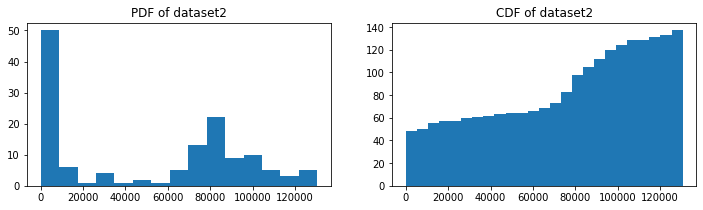

In [28]:
pdf_cdf_plot(dataset2,2)

#### BOXPLOT v/s CI

In [29]:
for i in range(4):
    n=5*pow(2,i)
    print('\n'+color.BOLD+f'For n = {n}\n'+color.END)
    for j in range(3):
        x=[80,95,100]
        print(color.GREEN+f'{x[j]}% Confidence Intervals'+color.END)
        print(f'Fraction of CIs whose width is greater than the IQR of dataset2: {np.sum(width_t2[i][j]>iqr_data)}%\n')


For n = 5

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 0%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 73%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 94%


For n = 10

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 0%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 0%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 51%


For n = 20

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 0%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 0%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 0%


For n = 40

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset2: 0%

95%

### CONCLUSIONS ON DATASET-2
##### The box plot is 100% accurate in providing the true mean of the data set, as it runs over the entire Dataset-2.  
#### A few points to note here:
    Mean and median of dataset-2 are not equal. The median is greater than the mean in this dataset.
    There's a large difference between the median and the 25th percentile, as compared to the difference between the median and the 75th percentile.
#### This implies that this dataset is irregularly disrtibuted and it has an a large density around 0, as seen in `pdf` and `cdf` of datset2.

## FOR DATASET-3

In [30]:
print("Mean of dataset3            "+str(mean(dataset3)))
print("Variance of dataset3        "+str(var(dataset3)))
print("Std deviation of dataset3   "+str(std(dataset3)))

Mean of dataset3            14.224379562043795
Variance of dataset3        0.10622607491075711
Std deviation of dataset3   0.3259234187823224


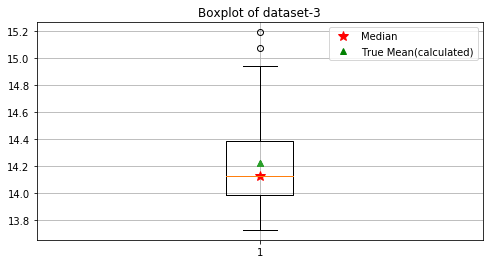

In [31]:
fig, ax1 = subplots(1, 1, figsize=(8,4))
percentile_25, median_data, percentile_75 = np.percentile(dataset3, [25, 50, 75])
ax1.boxplot(dataset3, showmeans=True);
ax1.plot(1,median_data,'r*',markersize=10,label='Median')
ax1.plot(1,mean(dataset3),'g^',label='True Mean(calculated)')
ax1.grid()
ax1.set_title('Boxplot of dataset-3')
ax1.legend()

In [32]:
print("Median of dataset3                     {}".format(median_data))
print("25th and 75th percentile of dataset3   {}, {}".format(percentile_25,percentile_75))
iqr_data = percentile_75 - percentile_25
print("Interquartile range of dataset3        {}".format(iqr_data))
print(f"Minimum of dataset3                    {dataset3.min()}")
print(f"Maximum of dataset3                    {dataset3.max()}")

Median of dataset3                     14.129999999999999
25th and 75th percentile of dataset3   13.989999999999998, 14.389999999999999
Interquartile range of dataset3        0.40000000000000036
Minimum of dataset3                    13.729999999999999
Maximum of dataset3                    15.19


In [33]:
means = [[],[],[],[]]
stds = [[],[],[],[]]
for i in range(4):
    for j in range(M):
        n = 5*pow(2,i)
        a = dataset3[np.random.randint(low = 0, high = len(dataset3), size = n)]
        means[i].append(np.mean(a))
        stds[i].append(np.std(a))
    means[i]=np.array(means[i])
    stds[i]=np.array(stds[i])


For sample size 5
μ = 14.20162
σ = 0.1394250178411322 



<Figure size 432x288 with 0 Axes>

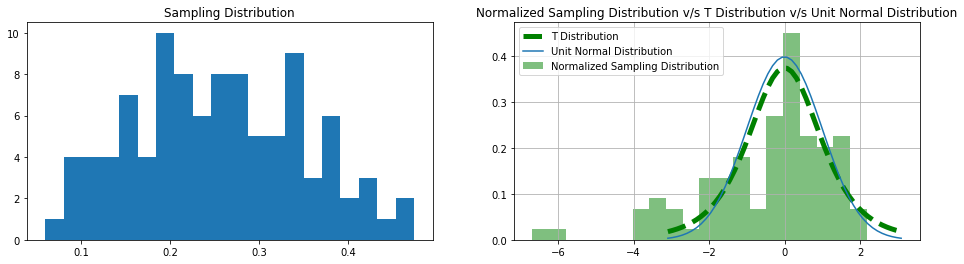




For sample size 10
μ = 14.236369999999999
σ = 0.10405293412489651 



<Figure size 432x288 with 0 Axes>

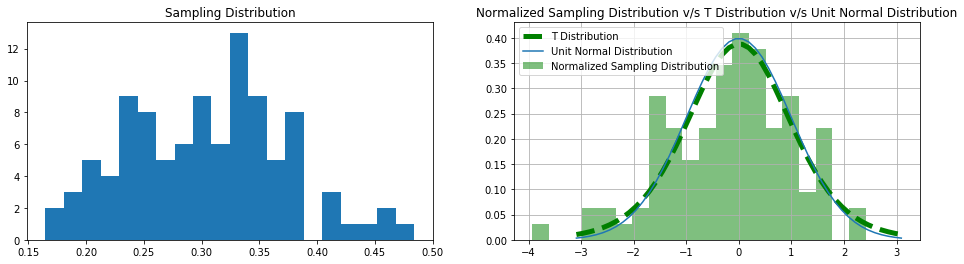




For sample size 20
μ = 14.233124999999998
σ = 0.07478259740741812 



<Figure size 432x288 with 0 Axes>

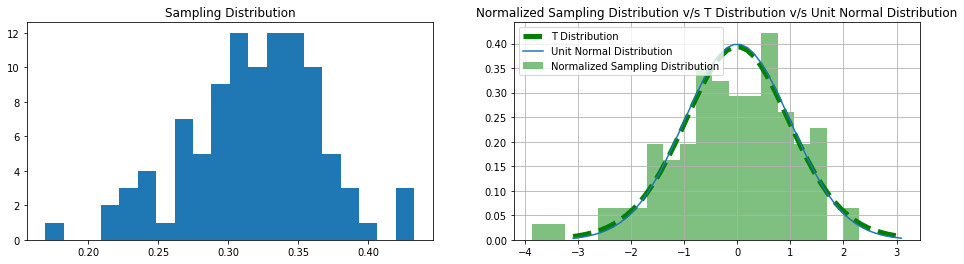




For sample size 40
μ = 14.2224425
σ = 0.05392153854212641 



<Figure size 432x288 with 0 Axes>

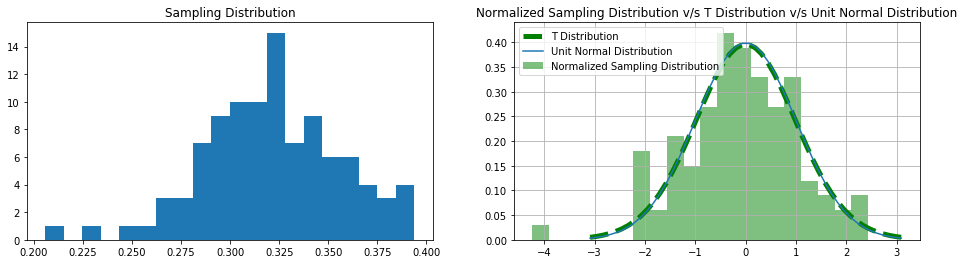

In [34]:
for i in range(4):
    figure(i)
    n=5*pow(2,i)
    compare(means[i],stds[i],n)

In [35]:
width_t3=[[],[],[],[]]
for i in range(4):
    n=5*pow(2,i)
    print('\n'+color.BOLD+f'For n = {n}\n'+color.END)
    for x in np.array([80,95,99]):
        alpha = 1 - x/100
        interval_dataset3_t, interval_dataset3_z = CIs(means[i], stds[i], n, alpha)
        width_t3[i].append(2*width(stds[i],n)*t(n-1).ppf(1 - alpha/2))
        print(color.GREEN+f'{x}% Confidence Intervals'+color.END)
        T=verify(dataset3, interval_dataset3_t)
        Z=verify(dataset3, interval_dataset3_z)
        print(f'{T}% instances of {x}% CI computed using T distribution contains true mean.')
        print(f'{Z}% instances of {x}% CI computed using unit normal distribution contains true mean.\n')
    print('\n')


For n = 5

80% Confidence Intervals
68.0% instances of 80% CI computed using T distribution contains true mean.
59.0% instances of 80% CI computed using unit normal distribution contains true mean.

95% Confidence Intervals
88.0% instances of 95% CI computed using T distribution contains true mean.
77.0% instances of 95% CI computed using unit normal distribution contains true mean.

99% Confidence Intervals
98.0% instances of 99% CI computed using T distribution contains true mean.
87.0% instances of 99% CI computed using unit normal distribution contains true mean.




For n = 10

80% Confidence Intervals
78.0% instances of 80% CI computed using T distribution contains true mean.
72.0% instances of 80% CI computed using unit normal distribution contains true mean.

95% Confidence Intervals
95.0% instances of 95% CI computed using T distribution contains true mean.
92.0% instances of 95% CI computed using unit normal distribution contains true mean.

99% Confidence Intervals
99.0% in

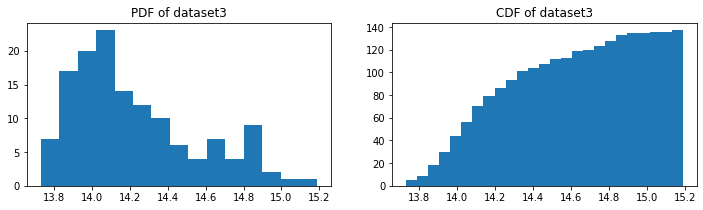

In [36]:
pdf_cdf_plot(dataset3,3)

#### BOXPLOT v/s CI

In [37]:
for i in range(4):
    n=5*pow(2,i)
    print('\n'+color.BOLD+f'For n = {n}\n'+color.END)
    for j in range(3):
        x=[80,95,100]
        print(color.GREEN+f'{x[j]}% Confidence Intervals'+color.END)
        print(f'Fraction of CIs whose width is greater than the IQR of dataset3: {np.sum(width_t3[i][j]>iqr_data)}%\n')


For n = 5

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 36%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 81%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 96%


For n = 10

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 1%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 61%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 95%


For n = 20

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 0%

95% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 2%

100% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 57%


For n = 40

80% Confidence Intervals
Fraction of CIs whose width is greater than the IQR of dataset3: 0%



### CONCLUSIONS ON DATASET-3
#### The box plot is 100% accurate in providing the true mean of the data set, as it runs over the entire Dataset-3.  
#### A few points to note here:
    Mean and median of dataset-3 are almost equal.
    There's a large difference between the median and the 75th percentile, as compared to the difference between the median and the 25th percentile.
#### This implies that this dataset is irregularly disrtibuted and it has an a large abnormal density around 14.9, as seen in `pdf` and `cdf` of datset3.

### A few points about Confidence Intervals
    We can observe that the dataset has a random distribution which might not be possible to predict.
    After doing the process of sampling distribution on these 3 datasets. 
    We observe that the sampling distribution is similar to a T distribution, and for larges value of sample size, this             approaches an unit normal distribution.
    Once a well defined function descibes this distribution, we can apply Confidence Intervals on the sampling distribution.
    
### BOXPLOT v/s CI comparisions
    For any dataset given we observe that, with increasing n and alpha, the fraction of CIs having width more than the IQR 
    of dataset, decreases.

## CONCLUSIONS
#### After analysing the 3 datasets and applying confidence intervals on the sample means, we come to a few results:
#### 1. For lower values of `n`, we observe that the CI's was more accurate for T distribution compared to the unit normal distribution, as theoritically, a T-distribution can replicate a sample distribution well.
#### 2. However, as `n` increases, the accuracies obtained by both the distributions is similar. This is by the reason that, for large values of `n`, the T-distribution approaches a Gaussian.
#### 3. In both the distributions, accuracy increases with `n`.
#### 4. As the value of `n` increases, the average width of the CIs decrease. When n approaches infinity, both the distributions indicate the true mean.
#### 5. Higher percentage CIs are wider than lower percentage CIs.
#### 6. As per the results in both distributions, true mean lies in approximately 80% of the computed 80% confidence intervals, and similarly for the 95% and 99% confidence intervals.